Abstract 

Heart Disease is among the most prevalent chronic diseases in the United States, impacting millions of Americans each year and exerting a significant financial burden on the economy. In the United States alone, heart disease claims roughly 647,000 lives each year — making it the leading cause of death. The buildup of plaques inside larger coronary arteries, molecular changes associated with aging, chronic inflammation, high blood pressure, and diabetes are all causes of and risk factors for heart disease.


The Centers for Disease Control and Prevention has identified high blood pressure, high blood cholesterol, and smoking as three key risk factors for heart disease. Roughly half of Americans have at least one of these three risk factors. The National Heart, Lung, and Blood Institute highlights a wider array of factors such as Age, Environment and Occupation, Family History and Genetics, Lifestyle Habits, Other Medical Conditions, Race or Ethnicity, and Sex for clinicians to use in diagnosing coronary heart disease. Diagnosis tends to be driven by an initial survey of these common risk factors followed by bloodwork and other tests.

We are trying to prdedict the independent variables that causes a heart attack or builds upto chest pain.

In [1]:
#installing dependencies
!pip install eli5

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import pyplot

In [3]:
 data = pd.read_csv("https://raw.githubusercontent.com/rochak94/info-mis-6105-Assignment2/main/heart_disease_health_indicators_BRFSS2015.csv")

In [4]:
#Viewing data in the file 
data.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [5]:
#checking if the any data is missing
data.isnull().sum()

HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

No data is missing form the files so there is no need of imputing or removing the null values in the data.

<Figure size 576x360 with 0 Axes>

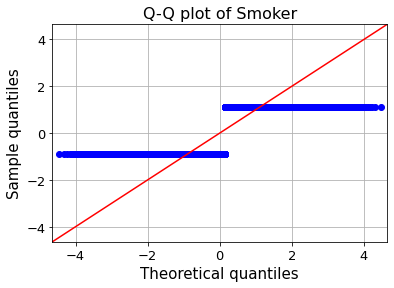

<Figure size 576x360 with 0 Axes>

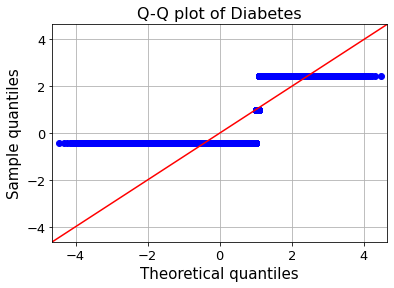

<Figure size 576x360 with 0 Axes>

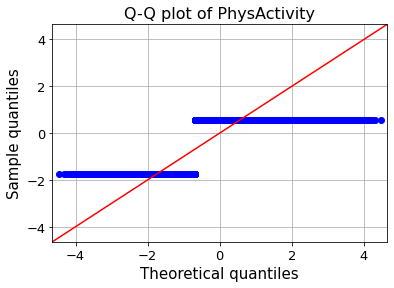

<Figure size 576x360 with 0 Axes>

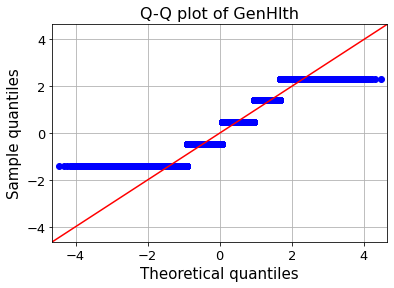

<Figure size 576x360 with 0 Axes>

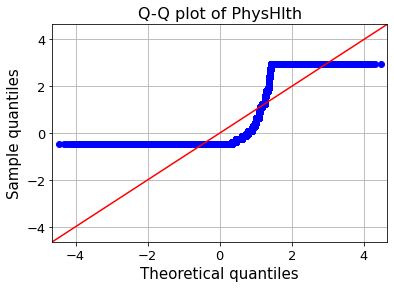

<Figure size 576x360 with 0 Axes>

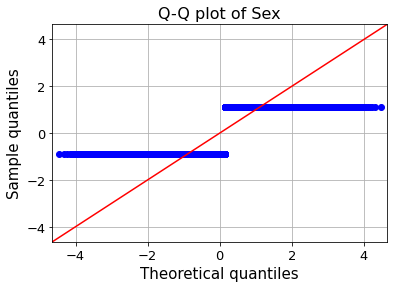

<Figure size 576x360 with 0 Axes>

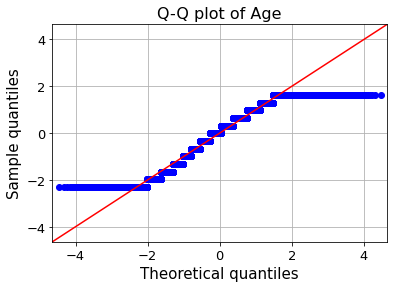

<Figure size 576x360 with 0 Axes>

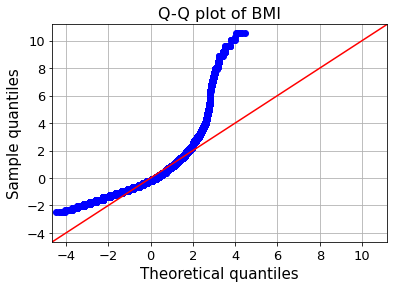

<Figure size 576x360 with 0 Axes>

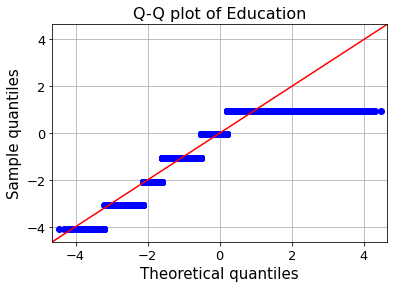

<Figure size 576x360 with 0 Axes>

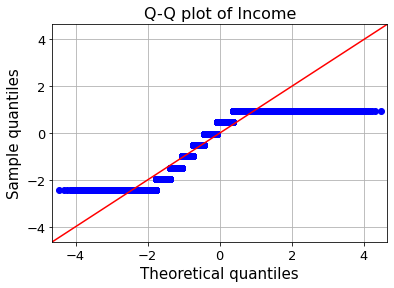

In [54]:
#checking the distribution of independent variables
from statsmodels.graphics.gofplots import qqplot
data_norm=data[['Smoker', 'Diabetes', 'PhysActivity', 'GenHlth', 'PhysHlth',
       'Sex','Age','BMI','Education','Income']]
for c in data_norm.columns[:]:
  plt.figure(figsize=(8,5))
  fig=qqplot(data_norm[c],line='45',fit='True')
  plt.xticks(fontsize=13)
  plt.yticks(fontsize=13)
  plt.xlabel("Theoretical quantiles",fontsize=15)
  plt.ylabel("Sample quantiles",fontsize=15)
  plt.title("Q-Q plot of {}".format(c),fontsize=16)
  plt.grid(True)
  plt.show()

**Observation **


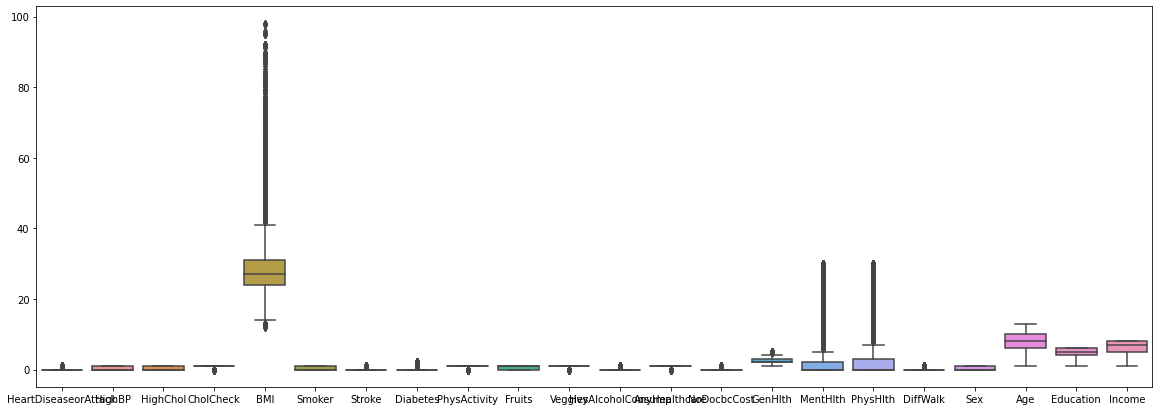

In [7]:
#Checking the Ranges of the predictor variables and dependent variable
plt.figure(figsize=(20,7))
sns.boxplot(data=data)

The data is not easy to visualize as all the data is not in the same range

In [8]:
#Creating binary vaiables for HeartDiseaseorAttack

data = pd.get_dummies(data)

# Normalizing the data in the BMI column beacuse the value is too high when compared to other independent variable

from sklearn import preprocessing

# Create x to store scaled values as floats
x = data[['BMI']].values.astype(float)

# Preparing for normalizing
min_max_scaler = preprocessing.MinMaxScaler()

# Transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
data[['BMI']] = pd.DataFrame(x_scaled)


In [9]:
#data after nromalizing and feature creation
data.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,0.325581,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,0.151163,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,0.186047,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,0.174419,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,0.139535,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


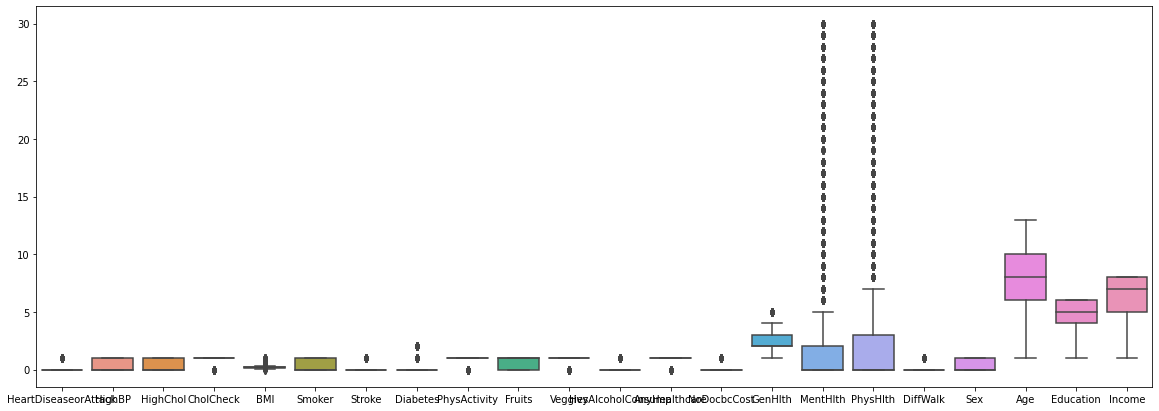

In [10]:
#Checking the Ranges of the predictor variables after normalizing and dependent variable
plt.figure(figsize=(20,7))
sns.boxplot(data=data)

Now it is clear to visualize and interpret the data. Looking at the boxplot above, we can infer below :

GenHlth, MentalHlth, PhysHlth have outliers.
Few values in independent variables are very small and close to zero which makes sense as DiffWalk,HvyAlcoholConsumption,Veggies,NoDocbcCost,AnyHlthCare will have very small physical attributes


In [11]:
#checking the correlation between all the features in the data
data.corr()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
HeartDiseaseorAttack,1.000000,0.209361,0.180765,0.044206,0.052904,0.114441,0.203002,0.180272,-0.087299,-0.019790,...,0.018734,0.031000,0.258383,0.064621,0.181698,0.212709,0.086096,0.221618,-0.099600,-0.141011
HighBP,0.209361,1.000000,0.298199,0.098508,0.213748,0.096991,0.129575,0.271596,-0.125267,-0.040555,...,0.038425,0.017358,0.300530,0.056456,0.161212,0.223618,0.052207,0.344452,-0.141358,-0.171235
HighChol,0.180765,0.298199,1.000000,0.085642,0.106722,0.091299,0.092620,0.209085,-0.078046,-0.040859,...,0.042230,0.013310,0.208426,0.062069,0.121751,0.144672,0.031205,0.272318,-0.070802,-0.085459
CholCheck,0.044206,0.098508,0.085642,1.000000,0.034495,-0.009929,0.024158,0.067546,0.004190,0.023849,...,0.117626,-0.058255,0.046589,-0.008366,0.031775,0.040585,-0.022115,0.090321,0.001510,0.014259
BMI,0.052904,0.213748,0.106722,0.034495,1.000000,0.013804,0.020153,0.224379,-0.147294,-0.087518,...,-0.018471,0.058206,0.239185,0.085310,0.121141,0.197078,0.042950,-0.036618,-0.103932,-0.100069
Smoker,0.114441,0.096991,0.091299,-0.009929,0.013804,1.000000,0.061173,0.062914,-0.087401,-0.077666,...,-0.023251,0.048946,0.163143,0.092196,0.116460,0.122463,0.093662,0.120641,-0.161955,-0.123937
Stroke,0.203002,0.129575,0.092620,0.024158,0.020153,0.061173,1.000000,0.107179,-0.069151,-0.013389,...,0.008776,0.034804,0.177942,0.070172,0.148944,0.176567,0.002978,0.126974,-0.076009,-0.128599
Diabetes,0.180272,0.271596,0.209085,0.067546,0.224379,0.062914,0.107179,1.000000,-0.121947,-0.042192,...,0.015410,0.035436,0.302587,0.073507,0.176287,0.224239,0.031040,0.185026,-0.130517,-0.171483
PhysActivity,-0.087299,-0.125267,-0.078046,0.004190,-0.147294,-0.087401,-0.069151,-0.121947,1.000000,0.142756,...,0.035505,-0.061638,-0.266186,-0.125587,-0.219230,-0.253174,0.032482,-0.092511,0.199658,0.198539
Fruits,-0.019790,-0.040555,-0.040859,0.023849,-0.087518,-0.077666,-0.013389,-0.042192,0.142756,1.000000,...,0.031544,-0.044243,-0.103854,-0.068217,-0.044633,-0.048352,-0.091175,0.064547,0.110187,0.079929


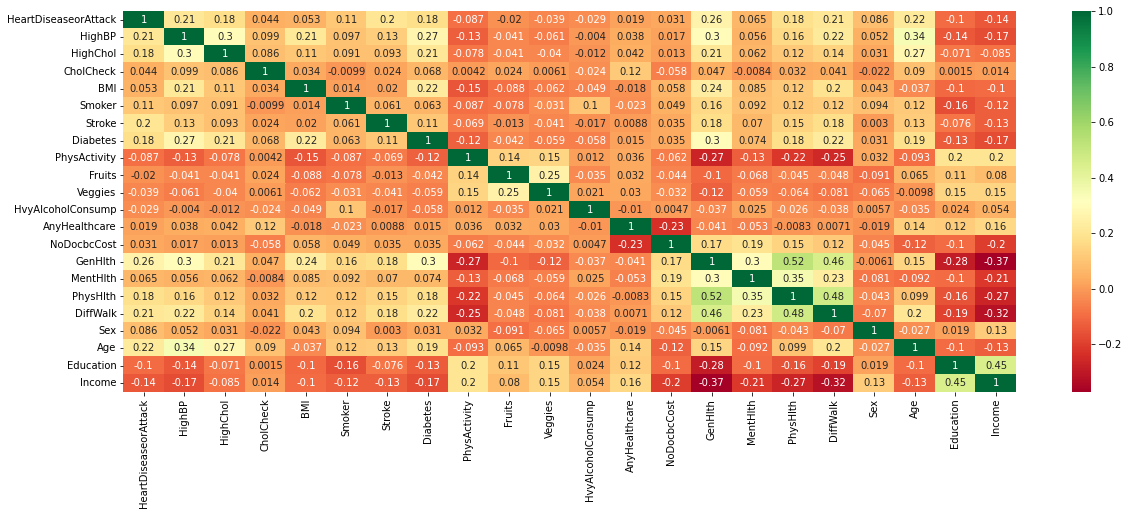

In [12]:
#the heat map of the correlation
plt.figure(figsize=(20,7))
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn')

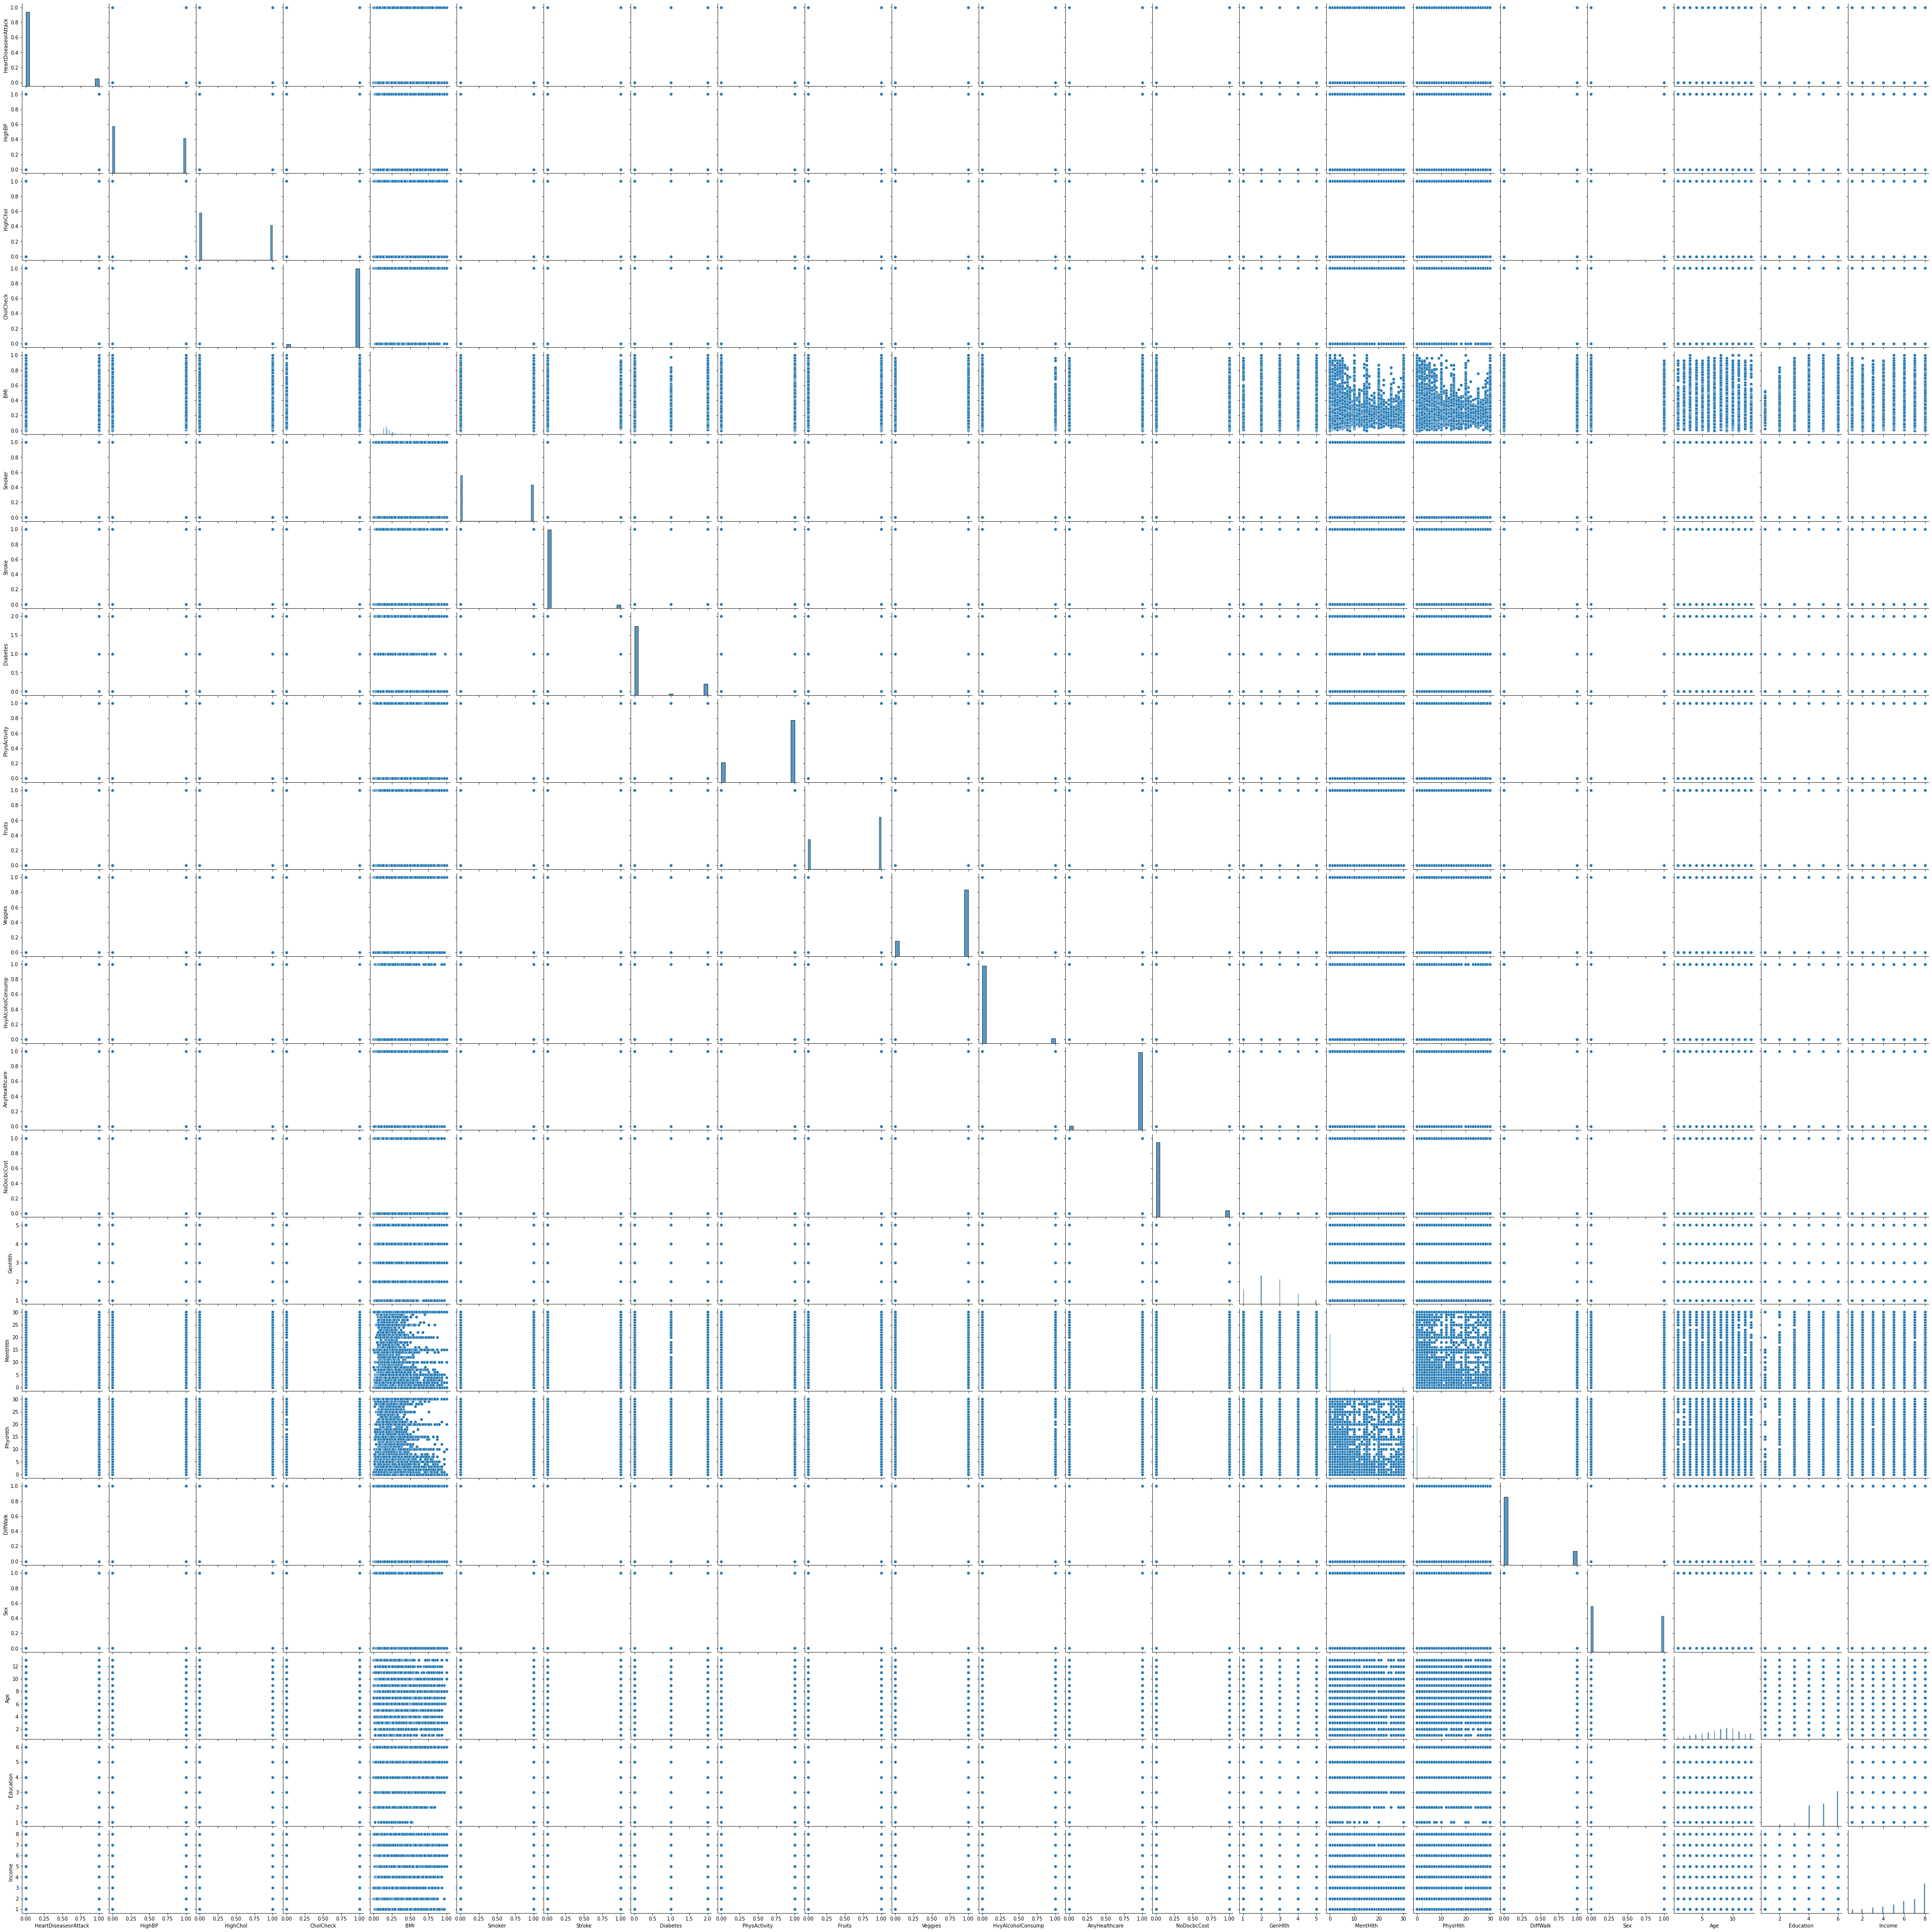

In [13]:
#pair plot to check the colinearity
sns.pairplot(data) 

In [14]:
#Using OLS for finding the p value to check the significant features
import statsmodels.api as sm

model = sm.OLS(data['HeartDiseaseorAttack'], data[['Smoker', 'Diabetes', 'PhysActivity', 'GenHlth', 'PhysHlth',
       'Sex','Age','BMI']]).fit()

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     HeartDiseaseorAttack   R-squared (uncentered):                   0.188
Model:                              OLS   Adj. R-squared (uncentered):              0.188
Method:                   Least Squares   F-statistic:                              7324.
Date:                  Sun, 03 Apr 2022   Prob (F-statistic):                        0.00
Time:                          09:11:59   Log-Likelihood:                         -33940.
No. Observations:                253680   AIC:                                  6.790e+04
Df Residuals:                    253672   BIC:                                  6.798e+04
Df Model:                             8                                                  
Covariance Type:              nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Smoker           0.0206      0.001     18.217      0.000       0.018       0.023
Diabetes         0.0463      0.001     55.583      0.000       0.045       0.048
PhysActivity    -0.0516      0.001    -45.186      0.000      -0.054      -0.049
GenHlth          0.0281      0.001     47.956      0.000       0.027       0.029
PhysHlth         0.0026    7.4e-05     35.365      0.000       0.002       0.003
Sex              0.0409      0.001     37.000      0.000       0.039       0.043
Age              0.0094      0.000     59.787      0.000       0.009       0.010
BMI             -0.3037      0.007    -46.126      0.000      -0.317      -0.291
==============================================================================
Omnibus:                   119319.911   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           497962.280
Skew:                           2.423   Prob(JB):                         0.00
Kurtosis:                       7.861   Cond. No.                         136.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

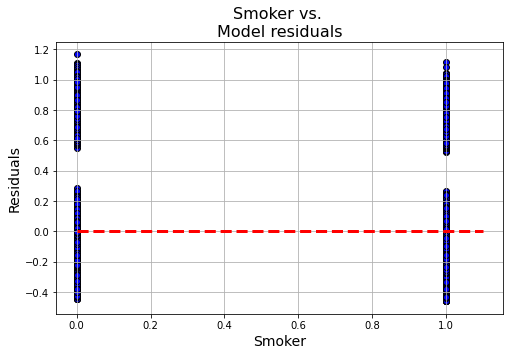

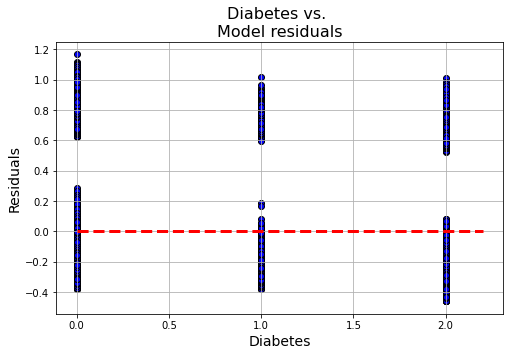

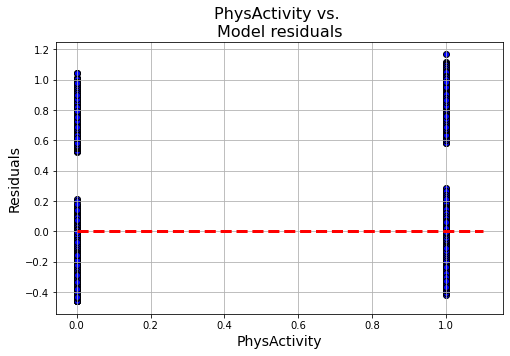

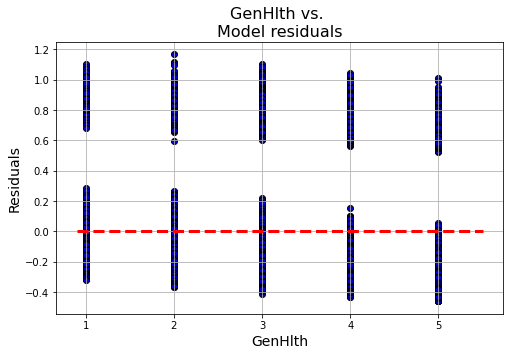

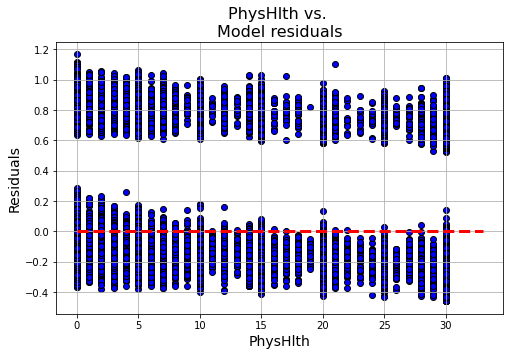

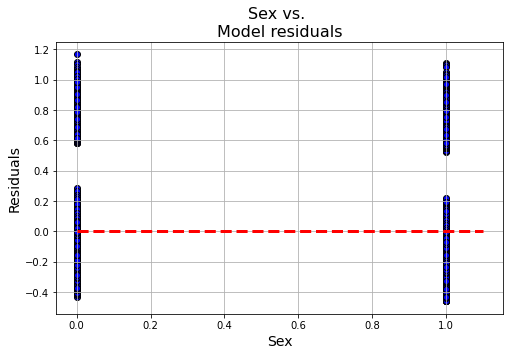

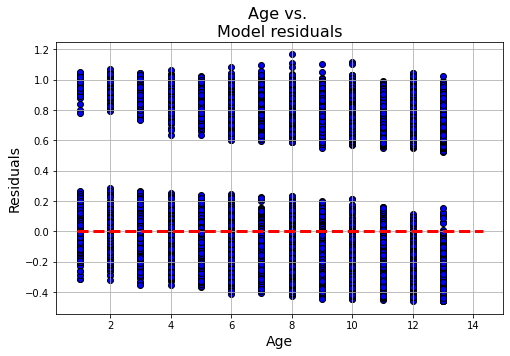

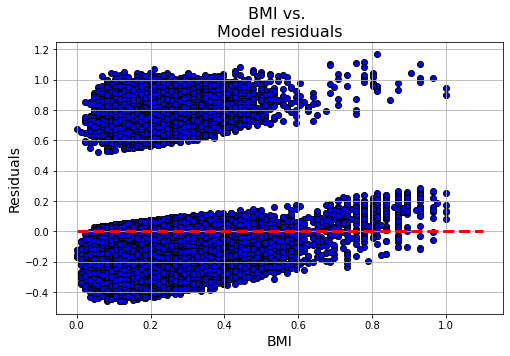

In [15]:
#Residuals vs. predicting variables plots
data_plot = data[['Smoker', 'Diabetes', 'PhysActivity', 'GenHlth', 'PhysHlth',
       'Sex','Age','BMI']]
for c in data_plot.columns[:]:
    plt.figure(figsize=(8,5))
    plt.title("{} vs. \nModel residuals".format(c),fontsize=16)
    plt.scatter(x=data_plot[c],y=model.resid,color='blue',edgecolor='k')
    plt.grid(True)
    xmin=min(data_plot[c])
    xmax = max(data_plot[c])
    plt.hlines(y=0,xmin=xmin*0.9,xmax=xmax*1.1,color='red',linestyle='--',lw=3)
    plt.xlabel(c,fontsize=14)
    plt.ylabel('Residuals',fontsize=14)
    plt.show()

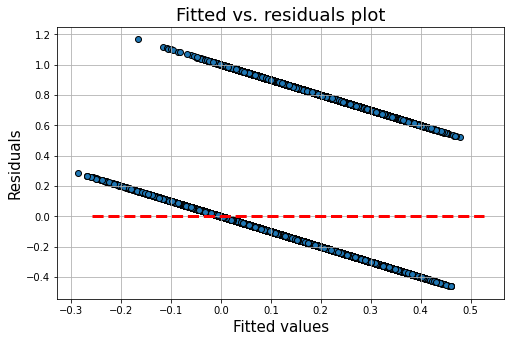

In [16]:
# Fitted values vs. residuals plots
plt.figure(figsize=(8,5))
p=plt.scatter(x=model.fittedvalues,y=model.resid,edgecolor='k')
xmin=min(model.fittedvalues)
xmax = max(model.fittedvalues)
plt.hlines(y=0,xmin=xmin*0.9,xmax=xmax*1.1,color='red',linestyle='--',lw=3)
plt.xlabel("Fitted values",fontsize=15)
plt.ylabel("Residuals",fontsize=15)
plt.title("Fitted vs. residuals plot",fontsize=18)
plt.grid(True)
plt.show()

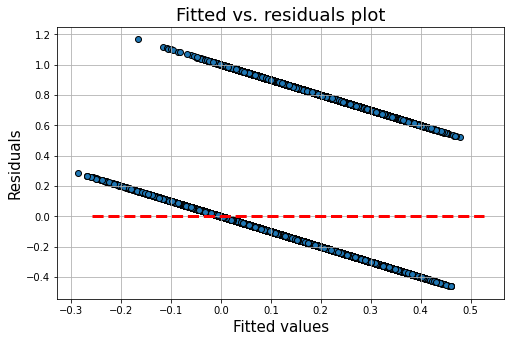

In [17]:
# Fitted values vs. residuals plots
plt.figure(figsize=(8,5))
p=plt.scatter(x=model.fittedvalues,y=model.resid,edgecolor='k')
xmin=min(model.fittedvalues)
xmax = max(model.fittedvalues)
plt.hlines(y=0,xmin=xmin*0.9,xmax=xmax*1.1,color='red',linestyle='--',lw=3)
plt.xlabel("Fitted values",fontsize=15)
plt.ylabel("Residuals",fontsize=15)
plt.title("Fitted vs. residuals plot",fontsize=18)
plt.grid(True)
plt.show()

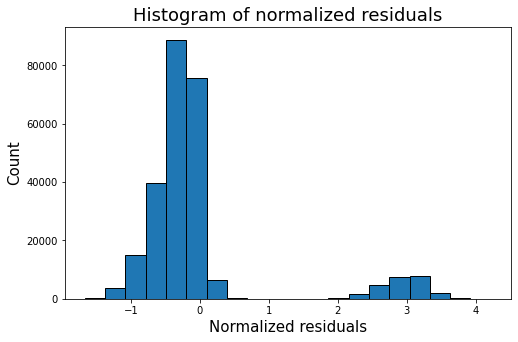

In [18]:
#Histogram of normalized residuals
plt.figure(figsize=(8,5))
plt.hist(model.resid_pearson,bins=20,edgecolor='k')
plt.ylabel('Count',fontsize=15)
plt.xlabel('Normalized residuals',fontsize=15)
plt.title("Histogram of normalized residuals",fontsize=18)
plt.show()

<Figure size 576x360 with 0 Axes>

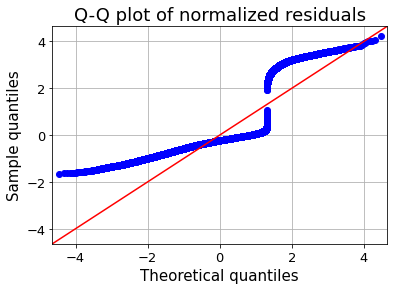

In [19]:
#Q-Q plot of the residuals
from statsmodels.graphics.gofplots import qqplot
plt.figure(figsize=(8,5))
fig=qqplot(model.resid_pearson,line='45',fit='True')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel("Theoretical quantiles",fontsize=15)
plt.ylabel("Sample quantiles",fontsize=15)
plt.title("Q-Q plot of normalized residuals",fontsize=18)
plt.grid(True)
plt.show()

**Building the Model**

**Train,Validation and Test Split**

In [20]:
from sklearn.model_selection import  train_test_split

X = data[['Smoker', 'Diabetes', 'PhysActivity', 'GenHlth', 'PhysHlth',
       'Sex','Age','BMI']]

y = data['HeartDiseaseorAttack']

#Spliting data into Training 76.5%, Validation set 13.5% and Test set 10%

X_t, X_test, y_t, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_t, y_t, test_size=0.15, random_state=1)

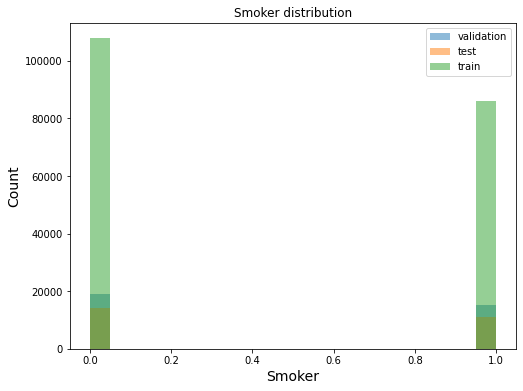

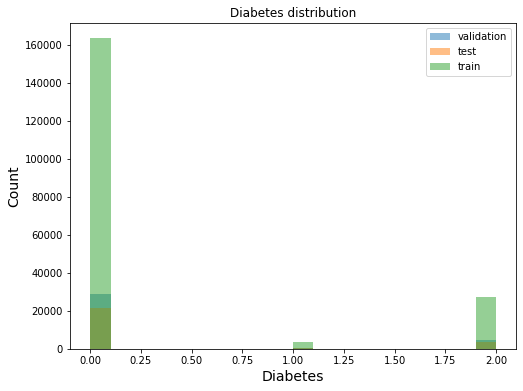

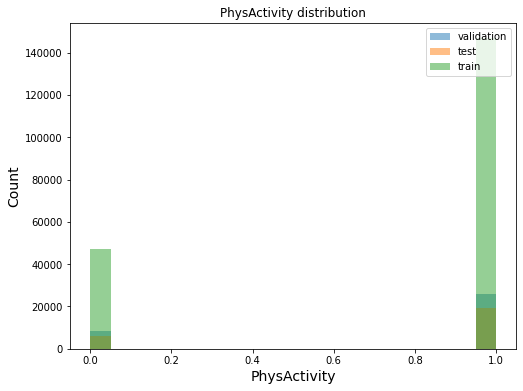

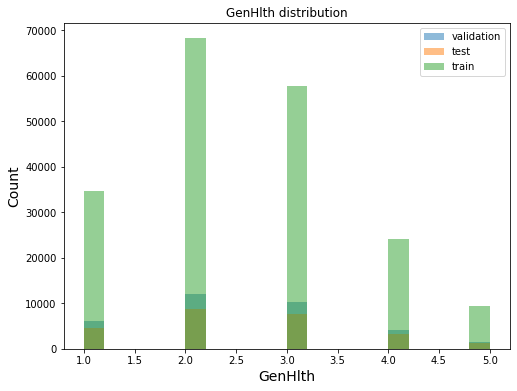

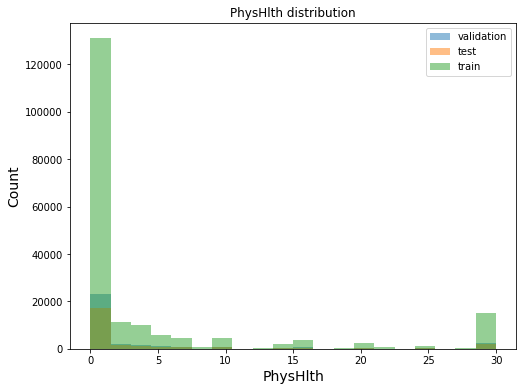

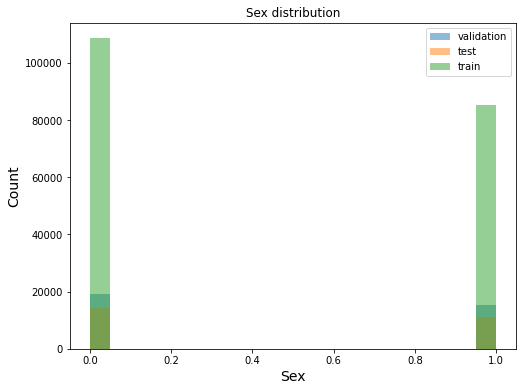

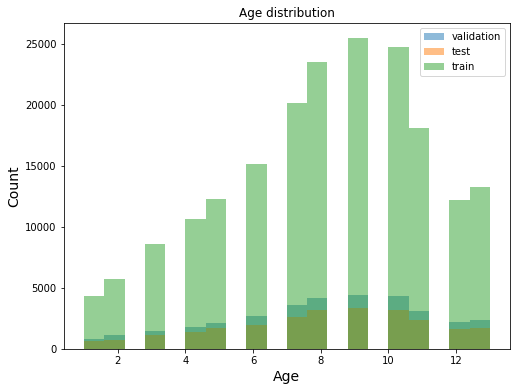

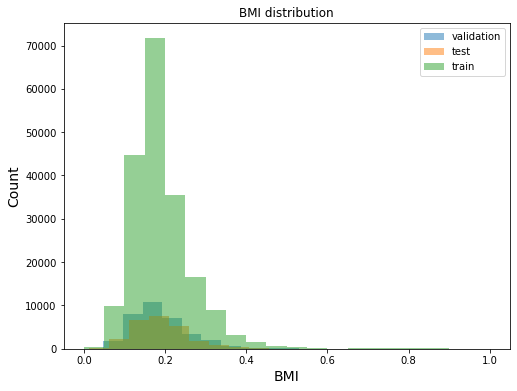

In [21]:
# Looking the data for test, training and validation set
X_test_plot = X_test[['Smoker', 'Diabetes', 'PhysActivity', 'GenHlth', 'PhysHlth',
       'Sex','Age','BMI']]

X_val_plot = X_val[['Smoker', 'Diabetes', 'PhysActivity', 'GenHlth', 'PhysHlth',
       'Sex','Age','BMI']]

X_train_plot = X_train[['Smoker', 'Diabetes', 'PhysActivity', 'GenHlth', 'PhysHlth',
       'Sex','Age','BMI']]

for c in X_test_plot.columns[:]:
  plt.figure(figsize=(8,6))
  plt.hist(X_val_plot[c], bins=20, alpha=0.5, label="validation")
  plt.hist(X_test_plot[c], bins=20, alpha=0.5, label="test")
  plt.hist(X_train_plot[c], bins=20, alpha=0.5, label="train")
  plt.xlabel(c, size=14)
  plt.ylabel("Count", size=14)
  plt.legend(loc='upper right')
  plt.title("{} distribution".format(c))
  plt.show()

Preparing the data


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , classification_report,accuracy_score
from sklearn.metrics import roc_curve , auc
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [23]:


data = pd.read_csv('https://raw.githubusercontent.com/rochak94/info-mis-6105-Assignment2/main/heart_disease_health_indicators_BRFSS2015.csv')
print('Shape of the data is ', data.shape)


Shape of the data is  (253680, 22)


In [24]:


# numerical fearures 
num_feats = ['BMI	', 'cholesterol', 'GenHlth',	'MentHlth',	'PhysHlth','Age','Education','Income']
# categorical features (binary)
bin_feats = ['HeartDiseaseorAttack',	'HighBP',	'HighChol',	'CholCheck','Smoker',	'Stroke','Diabetes'	,'PhysActivity',	'Fruits','AnyHealthcare',	'NoDocbcCost','Sex']
cat_feats =  bin_feats



In [25]:
## Training the model using Logistic Regression
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [26]:
## Predicting data
y_pred=model.predict(X_test)

In [27]:


## classification report
print(classification_report(y_test,y_pred))



              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95     22925
         1.0       0.50      0.08      0.14      2443

    accuracy                           0.90     25368
   macro avg       0.71      0.54      0.54     25368
weighted avg       0.87      0.90      0.87     25368



Confusion matrix is 
 [[22730   195]
 [ 2246   197]]


Text(42.0, 0.5, 'predicted label')

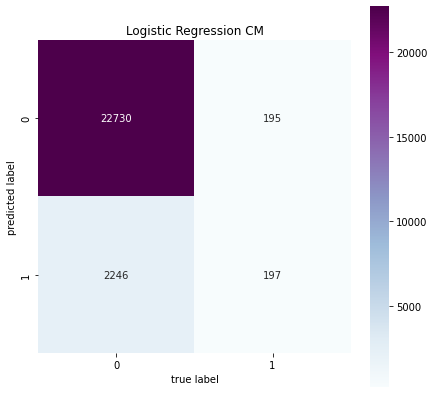

In [28]:


## confusion matrix
conf_mat=confusion_matrix(y_test,y_pred)
print("Confusion matrix is \n",conf_mat)

## plotting confusion matrix
plt.figure(figsize=(7,7))
plt.title("Logistic Regression CM")
sns.heatmap(conf_mat, square=True,cmap="BuPu",annot=True,fmt='d')
plt.xlabel('true label')
plt.ylabel('predicted label')



In [29]:


## accuracy score
print("accuracy score : ",accuracy_score(y_test,y_pred))

## percentage accurate
print("accuracy:", round(100*accuracy_score(y_test,y_pred)),"%")



accuracy score :  0.9037764112267423
accuracy: 90 %


In [30]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)

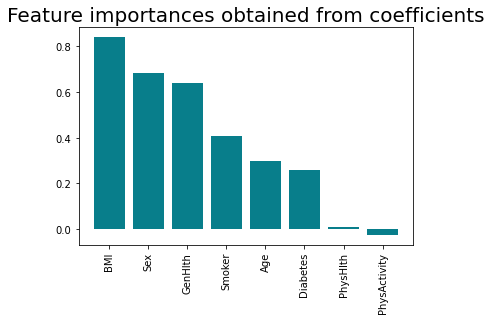

In [31]:
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

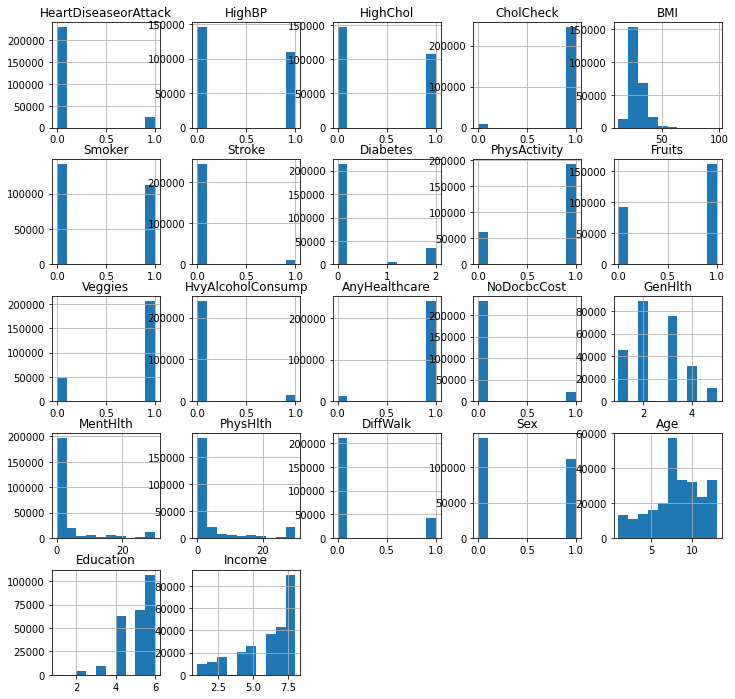

In [32]:
# plot histograms for each variable
data.hist(figsize = (12, 12))
plt.show()

In [30]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier 
import matplotlib.pylab as plt



In [42]:
# test classification dataset
from sklearn.datasets import make_classification
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=3)
# summarize the dataset
print(X.shape, y.shape)


(1000, 20) (1000,)


Missing the data and imputations 


In [5]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

In [52]:
data = pd.read_csv('https://raw.githubusercontent.com/rochak94/info-mis-6105-Assignment2/main/heart_disease_health_indicators_BRFSS2015.csv')

In [53]:
data.sample(10)

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
22136,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,10.0,5.0,8.0
78588,0.0,0.0,1.0,1.0,34.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,2.0,0.0,0.0,0.0,1.0,7.0,5.0,5.0
222697,0.0,0.0,0.0,1.0,29.0,1.0,0.0,2.0,1.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,3.0,5.0,7.0
116706,0.0,0.0,0.0,0.0,22.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,2.0,3.0,2.0,0.0,0.0,6.0,5.0,4.0
5871,0.0,0.0,0.0,1.0,33.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,2.0,0.0,3.0,0.0,1.0,7.0,4.0,8.0
115420,0.0,0.0,0.0,1.0,20.0,1.0,0.0,2.0,1.0,1.0,...,1.0,0.0,2.0,14.0,7.0,0.0,0.0,3.0,5.0,8.0
215907,1.0,1.0,1.0,1.0,22.0,0.0,0.0,2.0,0.0,0.0,...,1.0,0.0,5.0,25.0,20.0,1.0,1.0,12.0,5.0,3.0
7955,0.0,0.0,1.0,1.0,22.0,0.0,0.0,0.0,1.0,1.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,7.0,6.0,8.0
30606,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,3.0,1.0,0.0,7.0,6.0,8.0
106981,1.0,0.0,1.0,1.0,30.0,0.0,1.0,0.0,1.0,1.0,...,1.0,0.0,4.0,0.0,0.0,0.0,1.0,13.0,4.0,6.0


In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   Diabetes              253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [55]:
data['BMI'].describe()

count    253680.000000
mean         28.382364
std           6.608694
min          12.000000
25%          24.000000
50%          27.000000
75%          31.000000
max          98.000000
Name: BMI, dtype: float64

Create 3 col. for numbers for 1%, 5% and 10% missing data

In [97]:
df_number = data[['BMI']]
df_number['number_copy_1_percent'] = df_number[['BMI']]
df_number['number_copy_5_percent'] = df_number[['BMI']]
df_number['number_copy_10_percent'] = df_number[['BMI']]
df_number['Sample_num'] = data[['BMI']]
df_number['Sample_num'] = df_number['Sample_num']/10
df_number

,BMI,number_copy_1_percent,number_copy_5_percent,number_copy_10_percent,Sample_num
0,40.0,40.0,40.0,40.0,4.0
1,25.0,25.0,25.0,25.0,2.5
2,28.0,28.0,28.0,28.0,2.8
3,27.0,27.0,27.0,27.0,2.7
4,24.0,24.0,24.0,24.0,2.4
...,...,...,...,...,...
253675,45.0,45.0,45.0,45.0,4.5
253676,18.0,18.0,18.0,18.0,1.8
253677,28.0,28.0,28.0,28.0,2.8
253678,23.0,23.0,23.0,23.0,2.3


#### Check % missing values in this dataframe

In [98]:
def get_percent_missing(dataframe):
    
    percent_missing = dataframe.isnull().sum() * 100 / len(dataframe)
    missing_value_df = pd.DataFrame({'column_name': dataframe.columns,
                                     'percent_missing': percent_missing})
    return missing_value_df

In [99]:
print(get_percent_missing(df_number))

                                   column_name  percent_missing
BMI                                        BMI              0.0
number_copy_1_percent    number_copy_1_percent              0.0
number_copy_5_percent    number_copy_5_percent              0.0
number_copy_10_percent  number_copy_10_percent              0.0
Sample_num                          Sample_num              0.0


Create missing helper fn

In [68]:
def create_missing(dataframe, percent, col):
    dataframe.loc[dataframe.sample(frac = percent).index, col] = np.nan

Create missing data in each col

In [69]:
create_missing(df_number, 0.01, 'number_copy_1_percent')
create_missing(df_number, 0.05, 'number_copy_5_percent')
create_missing(df_number, 0.1, 'number_copy_10_percent')

Check % missing after removing data

In [96]:
print(get_percent_missing(df_number))

                                   column_name  percent_missing
BMI                                        BMI         0.000000
number_copy_1_percent    number_copy_1_percent         1.000079
number_copy_5_percent    number_copy_5_percent         5.000000
number_copy_10_percent  number_copy_10_percent        10.000000
Sample_num                          Sample_num         0.000000


Store Indices of missing rows

In [94]:
# Store Index of NaN values in each coloumns
number_1_idx = list(np.where(df_number['number_copy_1_percent'].isna())[0])
number_5_idx = list(np.where(df_number['number_copy_5_percent'].isna())[0])
number_10_idx = list(np.where(df_number['number_copy_10_percent'].isna())[0])

In [95]:
print(f"Length of number_1_idx is {len(number_1_idx)} and it contains {(len(number_1_idx)/len(df_number['number_copy_1_percent']))*100}% of total data in column | Total rows: {len(df_number['number_copy_1_percent'])}")
print(f"Length of number_5_idx is {len(number_5_idx)} and it contains {(len(number_5_idx)/len(df_number['number_copy_1_percent']))*100}% of total data in column | Total rows: {len(df_number['number_copy_1_percent'])}")
print(f"Length of number_10_idx is {len(number_10_idx)} and it contains {(len(number_10_idx)/len(df_number['number_copy_1_percent']))*100}% of total data in column | Total rows: {len(df_number['number_copy_1_percent'])}")

Length of number_1_idx is 2537 and it contains 1.000078839482813% of total data in column | Total rows: 253680
Length of number_5_idx is 12684 and it contains 5.0% of total data in column | Total rows: 253680
Length of number_10_idx is 25368 and it contains 10.0% of total data in column | Total rows: 253680


Performing KNN impute to df_number

In [100]:
#Creating a seperate dataframe for performing the KNN imputation
df_number1 = df_number[['Sample_num', 'number_copy_10_percent']]
imputer = KNNImputer(n_neighbors=5)
imputed_number_df = pd.DataFrame(imputer.fit_transform(df_number1), columns = df_number1.columns)


In [93]:
imputed_number_df.sample(10)

,number_copy_10_percent,original,diff
170588,1.0,1.0,0.0
174008,0.0,0.0,0.0
121280,1.0,1.0,0.0
146557,0.0,0.0,0.0
238676,0.0,0.0,0.0
165493,0.0,0.0,0.0
73832,0.0,0.0,0.0
246115,0.0,0.0,0.0
109634,1.0,1.0,0.0
158142,1.0,1.0,0.0


In [108]:
print(get_percent_missing(imputed_number_df))

                                   column_name  percent_missing
Sample_num                          Sample_num              0.0
number_copy_10_percent  number_copy_10_percent              0.0
original                              original              0.0


In [109]:
imputed_number_df['original'] = df_number['BMI']

In [110]:
imputed_number_df['diff'] = imputed_number_df['original'] - imputed_number_df['number_copy_10_percent']

In [89]:
for i in number_10_idx:
    print(str(imputed_number_df['number_copy_10_percent'][i])+", "+str(imputed_number_df['original'][i])+", "+str(imputed_number_df['diff'][i]))

Streaming output truncated to the last 5000 lines.
1.0, 1.0, 0.0
1.0, 1.0, 0.0
0.0, 0.0, 0.0
0.0, 0.0, 0.0
1.0, 1.0, 0.0
0.0, 0.0, 0.0
1.0, 1.0, 0.0
0.0, 0.0, 0.0
0.442771295420302, 1.0, 0.557228704579698
1.0, 1.0, 0.0
0.0, 0.0, 0.0
1.0, 1.0, 0.0
1.0, 1.0, 0.0
1.0, 1.0, 0.0
0.0, 0.0, 0.0
0.0, 0.0, 0.0
0.0, 0.0, 0.0
0.0, 0.0, 0.0
0.0, 0.0, 0.0
0.0, 0.0, 0.0
1.0, 1.0, 0.0
0.0, 0.0, 0.0
1.0, 1.0, 0.0
0.0, 0.0, 0.0
0.0, 0.0, 0.0
0.0, 0.0, 0.0
0.0, 0.0, 0.0
0.442771295420302, 1.0, 0.557228704579698
0.442771295420302, 0.0, -0.442771295420302
1.0, 1.0, 0.0
1.0, 1.0, 0.0
0.442771295420302, 0.0, -0.442771295420302
0.0, 0.0, 0.0
0.0, 0.0, 0.0
0.0, 0.0, 0.0
0.0, 0.0, 0.0
1.0, 1.0, 0.0
0.442771295420302, 1.0, 0.557228704579698
1.0, 1.0, 0.0
0.442771295420302, 0.0, -0.442771295420302
1.0, 1.0, 0.0
1.0, 1.0, 0.0
1.0, 1.0, 0.0
0.0, 0.0, 0.0
1.0, 1.0, 0.0
1.0, 1.0, 0.0
1.0, 1.0, 0.0
1.0, 1.0, 0.0
1.0, 1.0, 0.0
0.0, 0.0, 0.0
0.0, 0.0, 0.0
0.442771295420302, 1.0, 0.557228704579698
1.0, 1.0, 0.0
0.0, 0.0

In [107]:
imputed_number_df.to_csv('imputed_number_df.csv', index=False)

In [105]:
# create list of difference bwtween imputed and orginal value

number_diff_1 = []
number_diff_5 = []
number_diff_10 = []
count = 0
'''
for i in number_1_idx:
    count +=1
    diff1 = abs(imputed_number_df['number_copy_1_percent'][i] - df_number['BMI'][i])
    number_diff_1.append(diff1)

for i in number_5_idx:
    diff5 = abs(imputed_number_df['number_copy_5_percent'][i] - df_number['BMI'][i])
    number_diff_5.append(diff5)

'''    

for i in number_10_idx:
    diff10 = abs(imputed_number_df['number_copy_10_percent'][i] - df_number['BMI'][i])
    number_diff_10.append(diff10)



In [106]:
#print(len(number_diff_1))
#print(len(number_diff_5))
print(len(number_diff_10))

25368


In [ ]:
# estimate the bias and variance for a regression model
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from mlxtend.evaluate import bias_variance_decomp
# load dataset
url = ''
dataframe = read_csv(url, header=None)
# separate into inputs and outputs
data = dataframe.values
X, y = data[:, :-1], data[:, -1]
# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# define the model
model = LinearRegression()
# estimate bias and variance
mse, bias, var = bias_variance_decomp(model, X_train, y_train, X_test, y_test, loss='mse', num_rounds=200, random_seed=1)
# summarize results
print('MSE: %.3f' % mse)
print('Bias: %.3f' % bias)
print('Variance: %.3f' % var)

* What are the data types? (Only numeric and categorical)
 
 Ans: There are only two datas numberial and categorical as it is a binary     classification 

* What are the likely distributions of the numeric variables?
 
  Ans: The numeric values age,education and income are randomly distributed as they are shown in the q-q plots

* Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)

* Which independent variables are useful to predict a target (dependent variable)?

 Ans: there are a number of independent variable such as BMI,Age,PhysHlth,Smoker,GenHlth,PhysActivity

* Which independent variable have missing data? How much? 

  Ans: There is no missing data.

* Do the training and test sets have the same data?
 
   Ans: Yes the training and test sets are same but distributed randomly   
   without repetition according to test_split_train .it shouldn't be same because
   it will lead to overfitting.
  

* In the predictor variables independent of all the other predictor variables?

  Ans: it is not indepenedent as you can see in the correlation matrix BMI is  highly correlated with the PhysHlth,GenHlth, Age and Sex

* Which predictor variables are the most important?
  
  Ans: As shown in the importance plot the most important one is BMI 
 

* Do the ranges of the predictor variables make sense?
 
 Ans Yes they do make sense as every independent variable that makes the dependnt variable alter

* What are the distributions of the predictor variables?   
 Ans: The distribution are randomly distributed as we can see from the q-q plot that none of them lie on a straaigh tline so they are neither uniform or normal

* Remove outliers and keep outliers (does if have an effect of the final predictive model)?

 Ans: Removing outiers does make sense as you can see in the box-plot the BMI  has too many outliers and after normalizing MenHlth and PhysHlth are the only outliers.The residual plots witht he variables clearly shows that most of the variables have out;iers


 * Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values? 